# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
import concurrent.futures 
import requests
from pprint import pprint
import json
import os
from citipy import citipy
import random
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import time


plt.style.use('seaborn-poster')
API_KEY = '726f6729b1b0ce3ac75298331adb8ac7'
URL = "https://api.openweathermap.org/data/2.5/weather?"
CITIES_TOT = 1200
SETS_NUM = 50
API_KEY = '726f6729b1b0ce3ac75298331adb8ac7'
URL = "https://api.openweathermap.org/data/2.5/weather?"


In [13]:
random.seed(42)
ran_lat= [random.uniform(-90,90) for _ in range(CITIES_TOT)]
ran_long = [random.uniform(-180,180) for _ in range(CITIES_TOT)]
dd = list(zip(ran_lat,ran_long))
dd

[(25.096823722419074, 124.0143695332909),
 (-85.49806405991995, -92.40606906381588),
 (-40.494722693558536, 31.9936637890483),
 (-49.8220671332119, 8.626515480227368),
 (42.56481854952224, -37.52398913064013),
 (31.80590773612404, -68.30115773908992),
 (70.59232218687217, -57.775218786553),
 (-74.35101012670509, -60.0952959024725),
 (-14.054072456651326, -119.47222510355283),
 (-84.63650050114734, 3.7739824351733944),
 (-50.6451645353514, -138.9504096581211),
 (0.9639518586052276, 3.5827424362699105),
 (-85.22352545690455, 146.13218336881818),
 (-54.209222876403274, -54.224904429943095),
 (26.97919880031418, 81.85647804260554),
 (8.089466508579008, 114.8214965489467),
 (-50.320688032674596, 113.41332207000511),
 (16.067823097663563, -94.94321437917925),
 (55.697482202008786, -127.28008142003003),
 (-88.83022325794902, -108.98215098336603),
 (55.04746532990541, 36.863634698339695),
 (35.66509109788083, 93.67750639688114),
 (-28.754907026761465, 55.98324378674607),
 (-62.01369003387932, 

## Generate Cities List

In [14]:
cities = []
def generate_cities(lat):
    for rows in lat:
        city = citipy.nearest_city(rows[0],rows[1])
        cities.append(city.city_name)

generate_cities(dd)

final_cities = list(set(cities))
final_cities_clean = [final_cities[i:i+SETS_NUM] for i in range(0, len(final_cities), SETS_NUM)]
len(final_cities_clean)

11

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
start = time.perf_counter()
json_data = []
print("""Beginning Data Retrieval     
---------------------------------------""")
def get_weather_data(cities,set_num):
    
    for enum,city in enumerate(cities,start=1):  
        parameters = {
            'q' : city,
            'appid' : API_KEY,
            'units':'metric'

        }
        try:           
            data_request = requests.get(URL,params =parameters ).json()
            print(f"Processing Record {enum} of {set_num}| {data_request['name']}")            
        except:
            print("City not found. Skipping...")
        finally:
            json_data.append(data_request)

    
    
for n in range(len(final_cities_clean)):
    get_weather_data(final_cities_clean[n],n+1)
    time.sleep(0.10)        

 
print("""-----------------------------
Data Retrieval Complete      
-----------------------------""")

finish = time.perf_counter()
print(f'Finished in {round(finish-start, 2)} second(s)')

Beginning Data Retrieval     
---------------------------------------
Processing Record 1 of 1| Singureni
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of 1| Yurga
City not found. Skipping...
Processing Record 6 of 1| Havre-St-Pierre
Processing Record 7 of 1| Barcelos
Processing Record 8 of 1| São Filipe
Processing Record 9 of 1| Walvis Bay
Processing Record 10 of 1| Trincomalee
City not found. Skipping...
Processing Record 12 of 1| Yuanping
Processing Record 13 of 1| Richards Bay
Processing Record 14 of 1| Halifax
Processing Record 15 of 1| Yenagoa
Processing Record 16 of 1| Barcelona
Processing Record 17 of 1| Ponta do Sol
Processing Record 18 of 1| Nyurba
Processing Record 19 of 1| Sing Buri
Processing Record 20 of 1| Mar del Plata
Processing Record 21 of 1| Sobolevo
Processing Record 22 of 1| Moose Factory
Processing Record 23 of 1| Batemans Bay
Processing Record 24 of 1| Mogadishu
City not found. Skipping...
Processing Record 26 of 1| Kiruna
Processin

Processing Record 32 of 5| Hobart
Processing Record 33 of 5| Kumul
City not found. Skipping...
Processing Record 35 of 5| Itaituba
Processing Record 36 of 5| Yarmouth
Processing Record 37 of 5| Kayes
Processing Record 38 of 5| Chabahar
Processing Record 39 of 5| Asău
Processing Record 40 of 5| Movila Miresii
Processing Record 41 of 5| Surgut
Processing Record 42 of 5| Los Llanos de Aridane
Processing Record 43 of 5| Mehamn
Processing Record 44 of 5| Norrtälje
Processing Record 45 of 5| Rikitea
Processing Record 46 of 5| San Mateo del Mar
Processing Record 47 of 5| Port Elizabeth
Processing Record 48 of 5| Bairnsdale
Processing Record 49 of 5| Marsh Harbour
Processing Record 50 of 5| Castro
City not found. Skipping...
Processing Record 2 of 6| Wenshang
Processing Record 3 of 6| Taicheng
Processing Record 4 of 6| Codrington
Processing Record 5 of 6| Skellefteå
Processing Record 6 of 6| Yellowknife
Processing Record 7 of 6| Kwang Binh
Processing Record 8 of 6| Sitka
Processing Record 9 of

Processing Record 12 of 10| Ganzhou
Processing Record 13 of 10| Dubti
City not found. Skipping...
Processing Record 15 of 10| Cosenza
Processing Record 16 of 10| San Patricio
Processing Record 17 of 10| Machico
Processing Record 18 of 10| Alice Springs
Processing Record 19 of 10| Kavaratti
Processing Record 20 of 10| Kheri
Processing Record 21 of 10| Adré
Processing Record 22 of 10| Saint Paul Harbor
City not found. Skipping...
Processing Record 24 of 10| Bambanglipuro
Processing Record 25 of 10| Meulaboh
Processing Record 26 of 10| Buraidah
Processing Record 27 of 10| Tomatlán
Processing Record 28 of 10| Surdulica
Processing Record 29 of 10| Cape Town
Processing Record 30 of 10| Tarakan
Processing Record 31 of 10| La Ronge
Processing Record 32 of 10| Vestmanna
Processing Record 33 of 10| Lata
Processing Record 34 of 10| Southbridge
City not found. Skipping...
Processing Record 36 of 10| Billings Metropolitan Area
Processing Record 37 of 10| Faanui
Processing Record 38 of 10| Soe
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
city_name = []
latitude = []
longitude =  []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
for data in json_data:
    try:
        city_name.append(data['name'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
    except:
        pass
    

    
df = pd.DataFrame({
    'City':city_name,
    'Lat':latitude,
    'Lng':longitude,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
})



df.sort_values(by = 'City',ascending = True,inplace = True)
df.drop_duplicates(inplace=True)
df.reset_index(drop = True,inplace = True)
df

#Exporting to CSV

df.to_csv("../output_data/weather.csv",encoding='utf-8')

In [17]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,4.600000e+02
mean,20.282370,19.036652,17.379283,70.584783,52.710870,3.662457,1.602444e+09
std,33.543104,89.547216,10.991484,22.622973,40.040517,2.669972,1.903989e+02
min,-54.800000,-175.200000,-11.110000,10.000000,0.000000,0.340000,1.602443e+09
25%,-6.065000,-61.825000,9.970000,58.000000,5.000000,1.760000,1.602444e+09
50%,25.705000,20.935000,19.440000,78.000000,63.000000,3.015000,1.602444e+09
75%,47.025000,102.262500,25.992500,88.000000,90.000000,5.100000,1.602444e+09
max,78.220000,179.320000,41.570000,100.000000,100.000000,19.000000,1.602444e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
df_copy = df.copy()
df_humidity_100 = df_copy.loc[df['Humidity']>=100]
df_humidity_100.index

Int64Index([115, 155, 201, 209, 246, 247, 365, 366, 378, 417, 423, 454, 459], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df_copy.drop(axis=0, index=df_humidity_100.index,inplace=False)
clean_city_data.reset_index(drop = True,inplace = True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acapulco de Juárez,16.86,-99.89,30.00,70,75,1.00,MX,1602443949
1,Acaraú,-2.89,-40.12,28.80,63,0,7.83,BR,1602443525
2,Adrar,20.50,-10.07,35.54,15,14,1.91,MR,1602444146
3,Adré,13.47,22.20,27.67,40,0,0.99,TD,1602444191
4,Ahipara,-35.17,173.17,15.40,92,100,4.27,NZ,1602444035
...,...,...,...,...,...,...,...,...,...
442,Yurga,55.72,84.89,2.07,96,100,2.74,RU,1602443647
443,Zacualpan,21.25,-105.17,31.00,48,5,3.78,MX,1602443865
444,Zhigansk,66.77,123.37,-8.64,96,63,3.03,RU,1602443794
445,Zhukovo,55.03,36.74,11.00,71,100,3.00,RU,1602443868


In [20]:
clean_city_data['City'].value_counts()

Vila Velha       1
Gondā City       1
Novaya Igirma    1
Kaniama          1
Lunenburg        1
                ..
Tasiilaq         1
Ossora           1
Hermanus         1
Ixtapa           1
Hobart           1
Name: City, Length: 447, dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

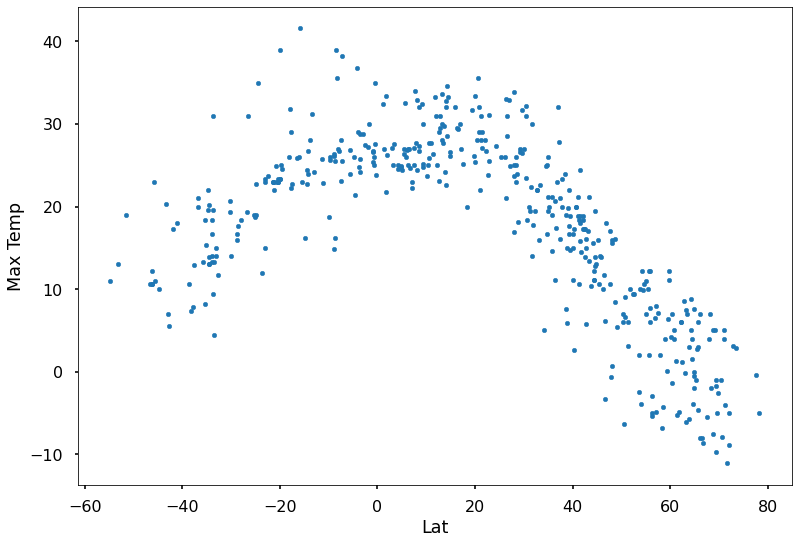

In [21]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Max Temp' )
plt.show()

## Latitude vs. Humidity Plot

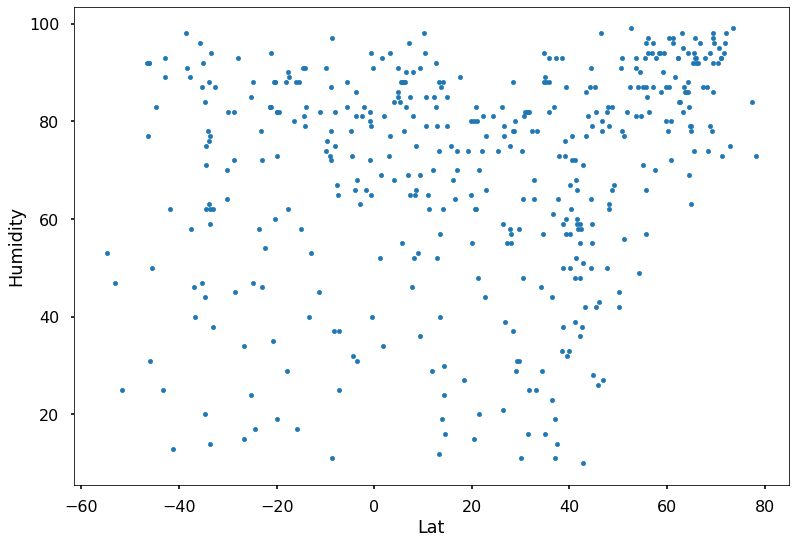

In [22]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Humidity' )
plt.show()

## Latitude vs. Cloudiness Plot

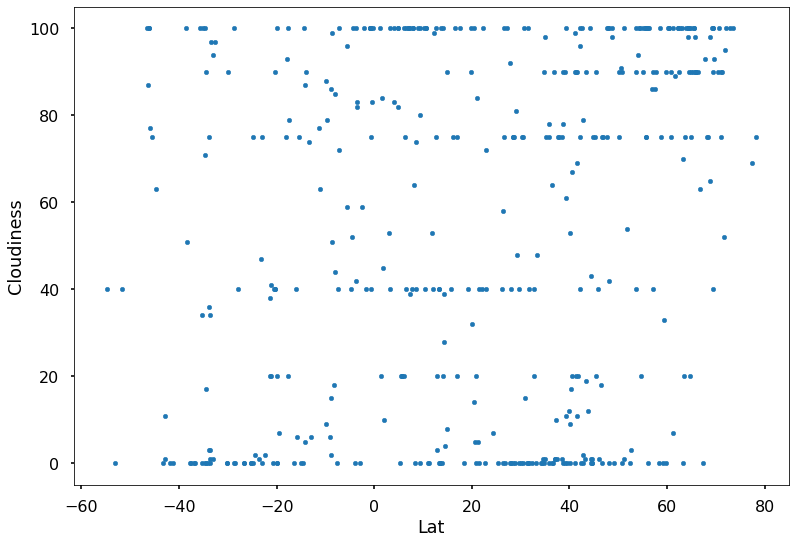

In [23]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Cloudiness' )
plt.show()

## Latitude vs. Wind Speed Plot

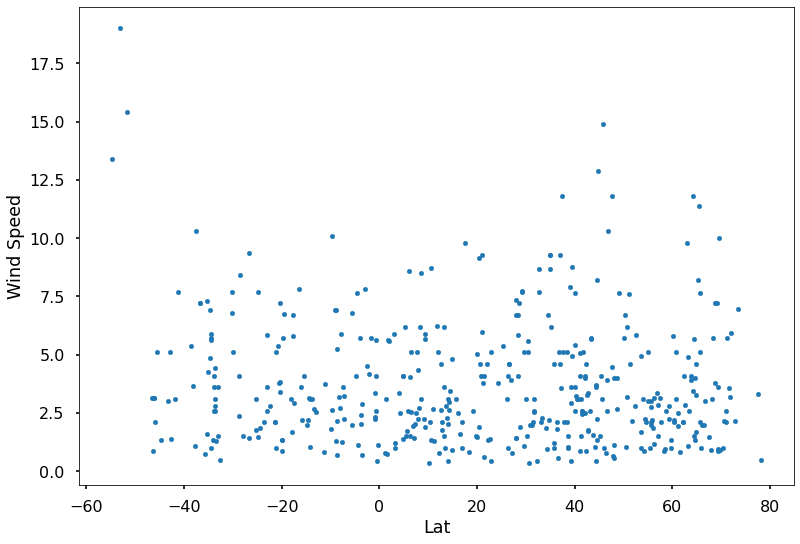

In [24]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Wind Speed' )
plt.show()

## Linear Regression

In [25]:
north_hem = clean_city_data.copy()
north_hem = north_hem.loc[north_hem['Lng'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

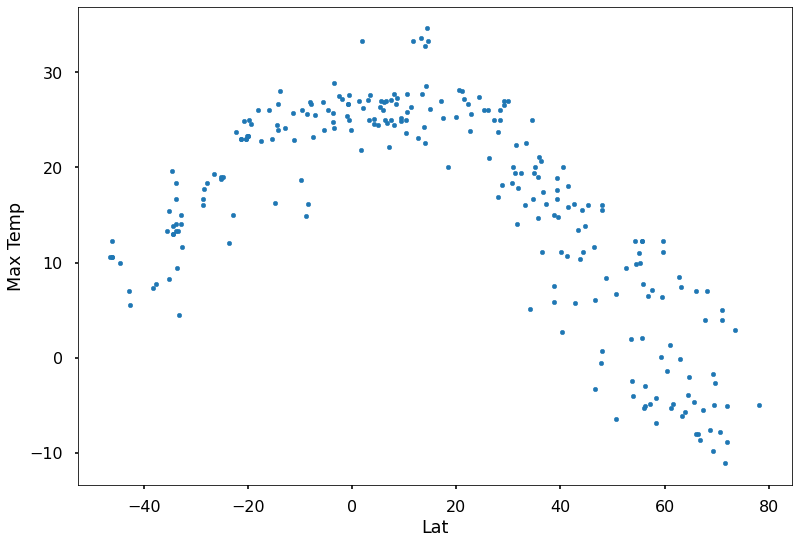

In [26]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

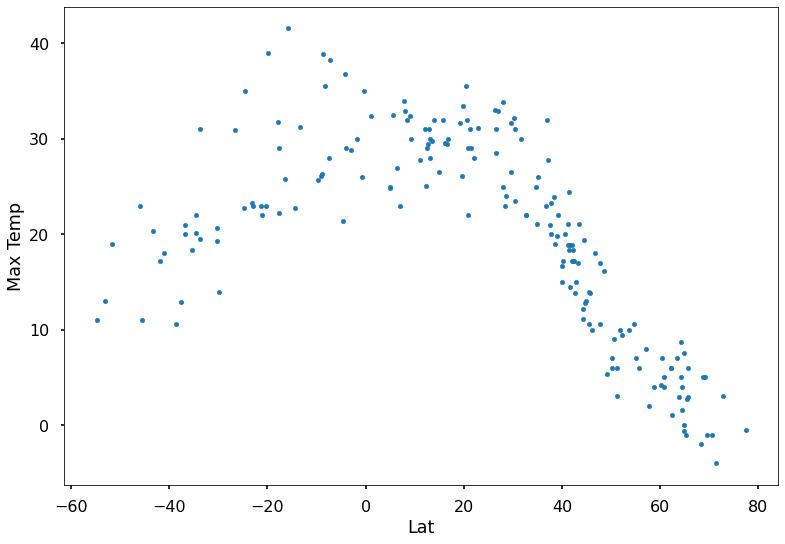

In [27]:
south_hem = clean_city_data.copy()
south_hem = south_hem.loc[south_hem['Lng'] < 0]
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

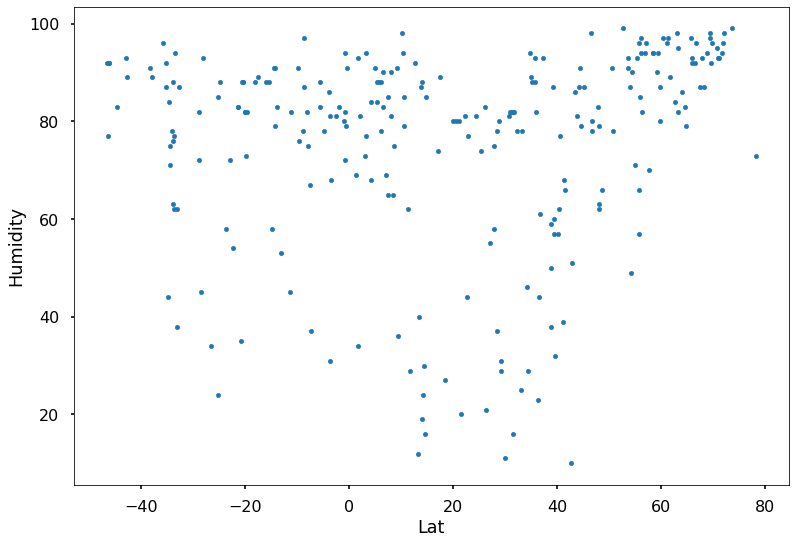

In [28]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

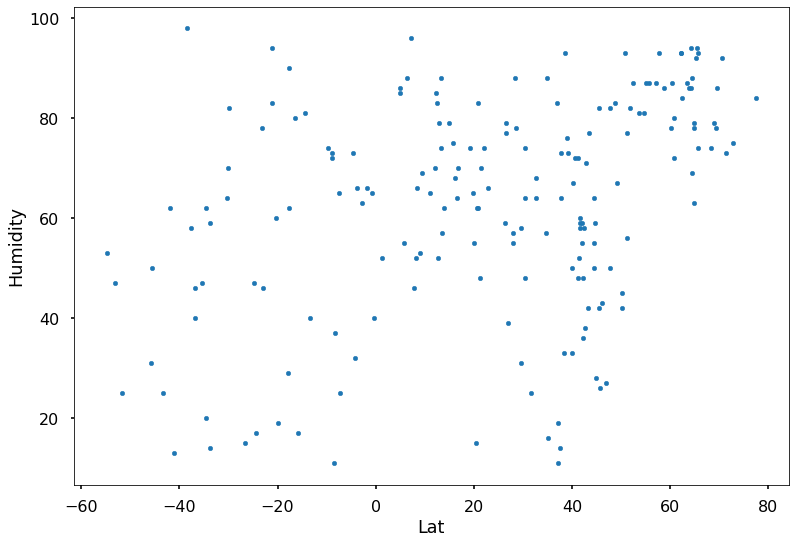

In [29]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

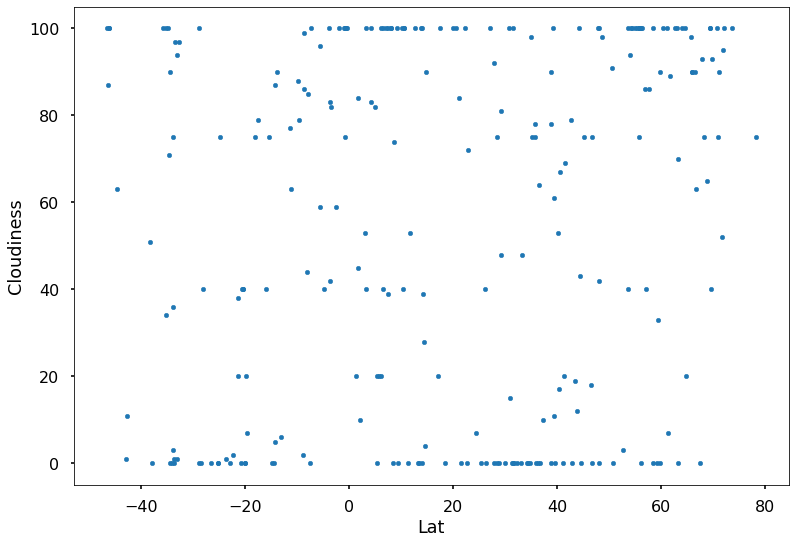

In [30]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

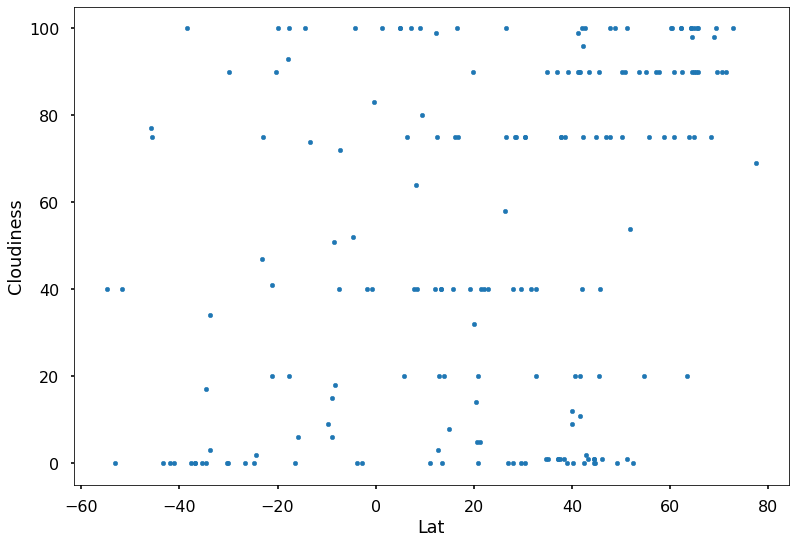

In [31]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

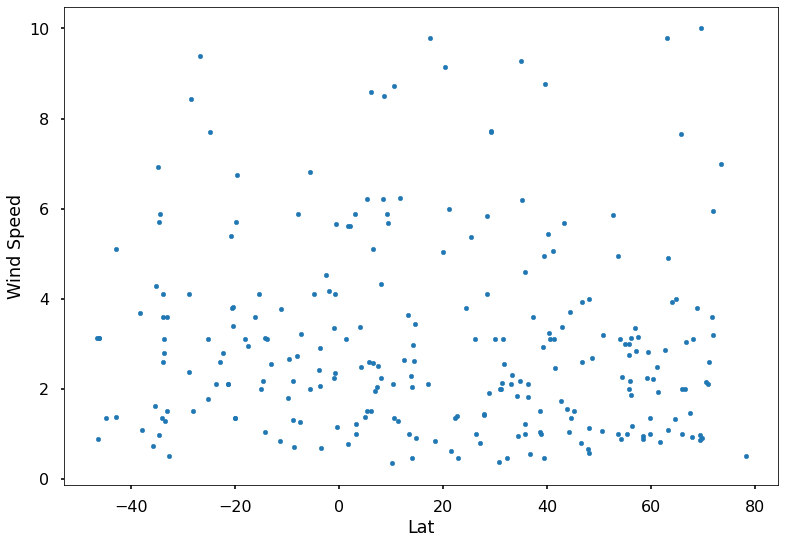

In [32]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

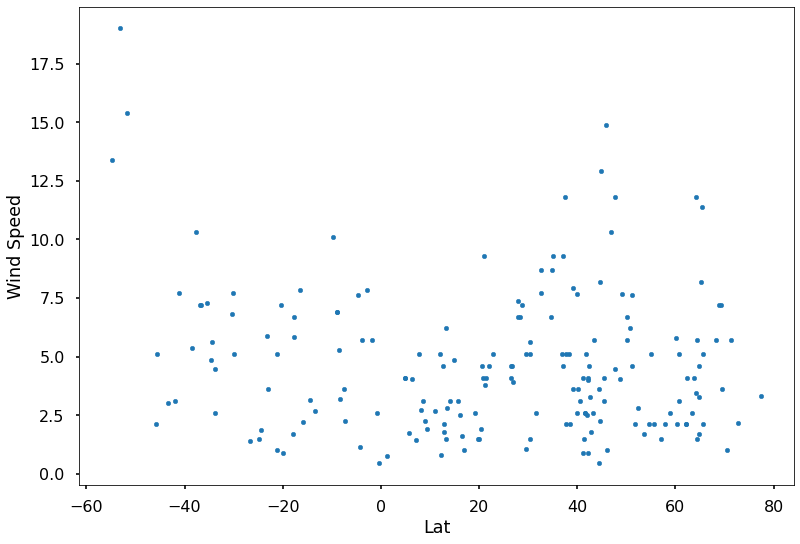

In [33]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Wind Speed')
plt.show()